# Data Manipulation using Pandas

In [53]:
import pandas as pd
gapminder = pd.read_csv("gapminder.csv",header = 0,sep = ',')

In [54]:
gapminder.head() #Basic Overview of the data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [55]:
gapminder['lifeExp'][99] #Life expectancy of 100th

43.453

In [56]:
gapminder_subset = gapminder[['country','year','gdpPercap']] #subset by column
# gapminder.loc[: , ['country' , 'year' , 'gdpPercap']] also works
gapminder_subset.head()

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106


In [57]:
gapminder['year'].unique() #Years that presented in the dataset

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

# Simple Aggregation

In [58]:
# In 2017, the average life expectancies of each country
avg_life_countries = gapminder[gapminder['year']==2007]['lifeExp'].mean()
avg_life_countries

67.00742253521126

In [59]:
# Create a dataframe that has all countries in Europe with GDP per capita less than the average European GDP per capita in 2007? 
avg_gdp_countries = gapminder[gapminder['year']==2007][gapminder['continent']=='Europe']['gdpPercap'].mean()
avg_gdp_countries

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


25054.481635933327

In [60]:
countries = gapminder[(gapminder['year']==2007) & (gapminder['gdpPercap']<avg_gdp_countries) & (gapminder['continent']=='Europe')]\
['country'].unique()
len(countries)  #There are 13 countries

13

In [61]:
countries

array(['Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Czech Republic', 'Hungary', 'Montenegro', 'Poland', 'Portugal',
       'Romania', 'Serbia', 'Slovak Republic', 'Turkey'], dtype=object)

In [62]:
gdpPercap = gapminder[(gapminder['year']==2007) & (gapminder['gdpPercap']<avg_gdp_countries) & (gapminder['continent']=='Europe')]\
['gdpPercap']

In [63]:
dictionary = dict(zip(countries,gdpPercap))
dictionary

{'Albania': 5937.029525999999,
 'Bosnia and Herzegovina': 7446.298803,
 'Bulgaria': 10680.79282,
 'Croatia': 14619.222719999998,
 'Czech Republic': 22833.30851,
 'Hungary': 18008.94444,
 'Montenegro': 9253.896111,
 'Poland': 15389.924680000002,
 'Portugal': 20509.64777,
 'Romania': 10808.47561,
 'Serbia': 9786.534714,
 'Slovak Republic': 18678.31435,
 'Turkey': 8458.276384}

In [64]:
import matplotlib.pyplot as plt

,country,year,gdpPercap
12,Albania,1952,1601.056136
13,Albania,1957,1942.284244
14,Albania,1962,2312.888958
15,Albania,1967,2760.196931
16,Albania,1972,3313.422188
17,Albania,1977,3533.003910
18,Albania,1982,3630.880722
19,Albania,1987,3738.932735
20,Albania,1992,2497.437901
21,Albania,1997,3193.054604


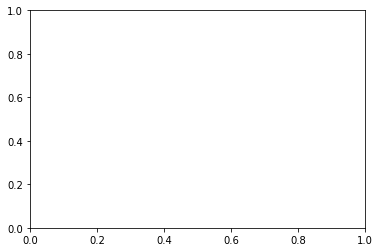

In [65]:
ax = plt.gca()
df = gapminder_subset[gapminder_subset.country.isin(['China','Japan','Albania'])]
df


country
Albania    AxesSubplot(0.125,0.125;0.775x0.755)
China      AxesSubplot(0.125,0.125;0.775x0.755)
Japan      AxesSubplot(0.125,0.125;0.775x0.755)
Name: gdpPercap, dtype: object

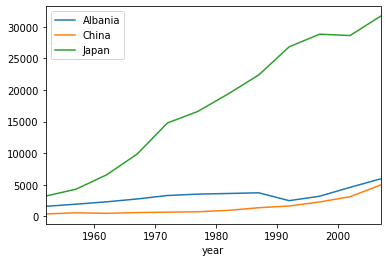

In [66]:
df.set_index('year',inplace = True)
df.groupby('country')['gdpPercap'].\
    plot(legend = True)
